<a href="https://colab.research.google.com/github/Himanshumahajanstd2/LGM-projects-/blob/main/PREDICTION_USING_DECISION_TREE_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 2 - PREDICTION USING DECISION TREE ALGORITHM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
 df=pd.read_csv('iris1.csv')

In [ ]:
 df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[

In [ ]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 5)

In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


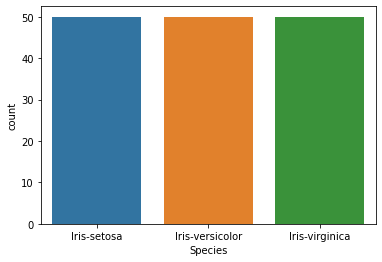

In [ ]:
sns.countplot(df['Species']);

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe033c0e2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe033c0e9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe033c03f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe033c1d0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe033c1d3a0>],
 'means': []}

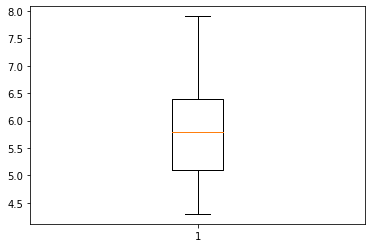

In [ ]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe033b6da00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe033b7a100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe033b6d6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe033b7a7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe033b7aaf0>],
 'means': []}

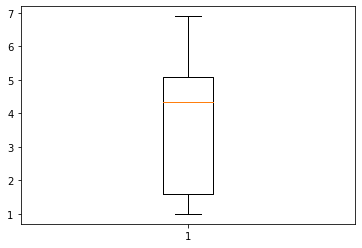

In [ ]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe02ce766d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe02ce76d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe02ce76370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe02ce80490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe02ce80790>],
 'means': []}

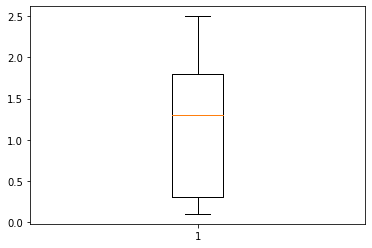

In [ ]:
plt.boxplot(df['PetalWidthCm'])

In [ ]:
colors=['green','orange','blue']
species=['Iris-viriginca','Iris-versicolor','Iris-setosa']

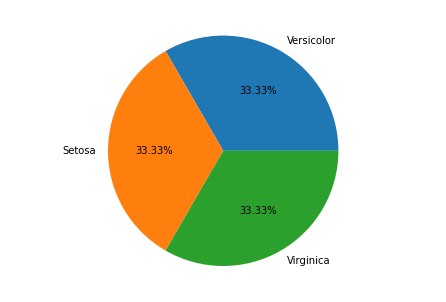

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['Versicolor','Setosa','Virginica']
s=[50,50,50]
ax.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

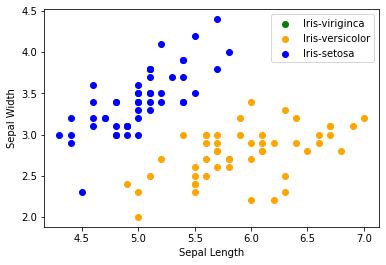

In [ ]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

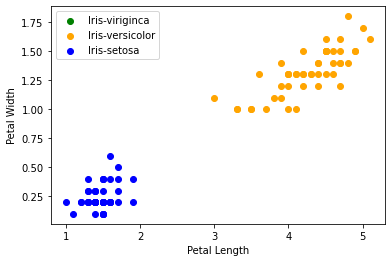

In [ ]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

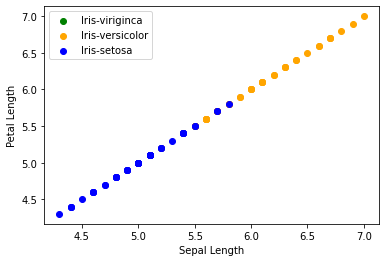

In [ ]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

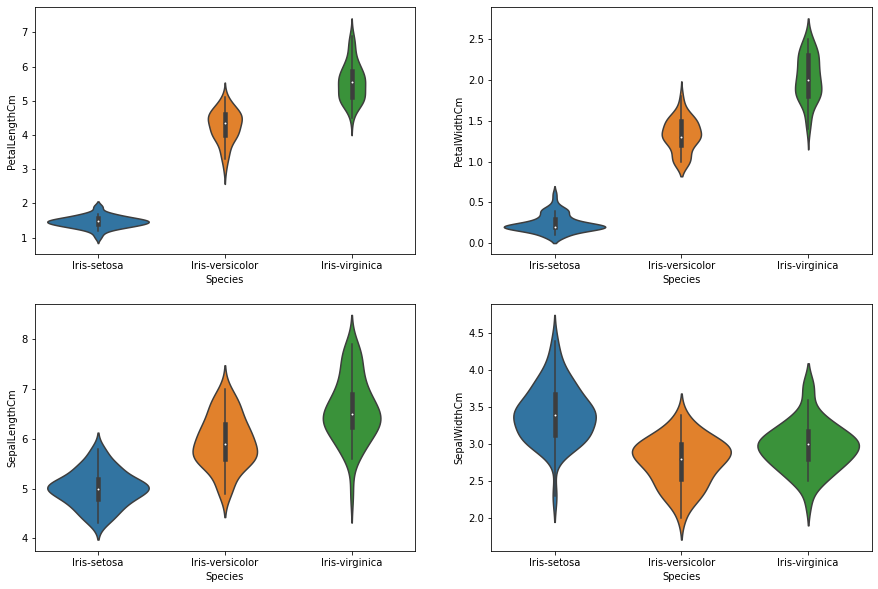

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

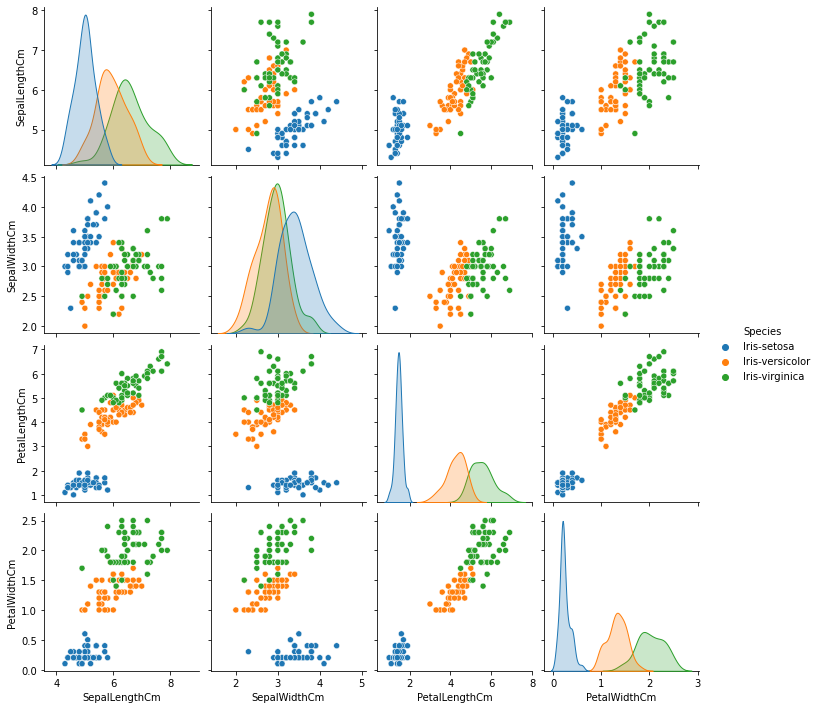

In [ ]:
sns.pairplot(df,hue='Species')

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


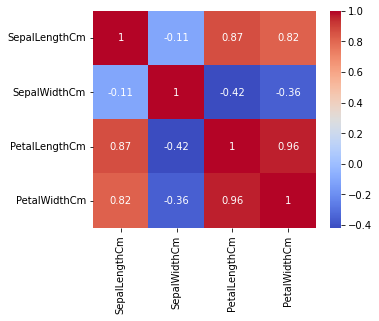

In [ ]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

### Model Building Decision Tree :

In [ ]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [ ]:
clf

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
y_pred

array([2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1,
       2])

In [ ]:
y_test

129    2
106    2
12     0
130    2
48     0
47     0
23     0
89     1
72     1
95     1
119    2
76     1
31     0
16     0
141    2
45     0
4      0
127    2
114    2
32     0
69     1
93     1
133    2
87     1
66     1
96     1
145    2
149    2
78     1
50     1
38     0
82     1
0      0
27     0
80     1
121    2
105    2
128    2
10     0
11     0
5      0
103    2
25     0
62     1
140    2
Name: Species, dtype: int64

In [ ]:
data_frame =pd.DataFrame({'Actual Data':y_test,"Predicted Data":y_pred})

In [ ]:
data_frame.head()

,Actual Data,Predicted Data
129,2,2
106,2,1
12,0,0
130,2,2
48,0,0


In [ ]:
data_frame.tail()

,Actual Data,Predicted Data
5,0,0
103,2,2
25,0,0
62,1,1
140,2,2


### Accuracy of the model:

In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9333333333333333


### Visualizing the decision tree:

In [ ]:
col_names = ["Sepal length","Sepal width","Petal length","Petal width"]
target_names=["Setosa","Versicolor","Virginica"]

[Text(0.375, 0.9, 'Petal length <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]\nclass = Versicolor'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.7, 'Petal width <= 1.75\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]\nclass = Versicolor'),
 Text(0.25, 0.5, 'Petal length <= 5.35\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = Versicolor'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Versicolor'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(0.75, 0.5, 'Petal length <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = Virginica'),
 Text(0.625, 0.3, 'Sepal width <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Virginica'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Virginica'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(0.875, 0.3, 'gini = 0.0\nsamp

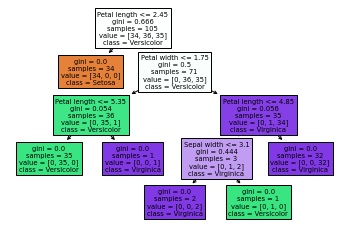

In [ ]:
plot_tree(clf,feature_names=col_names,class_names=target_names,filled=True)

In [ ]:
model=DecisionTreeClassifier().fit(X,Y)

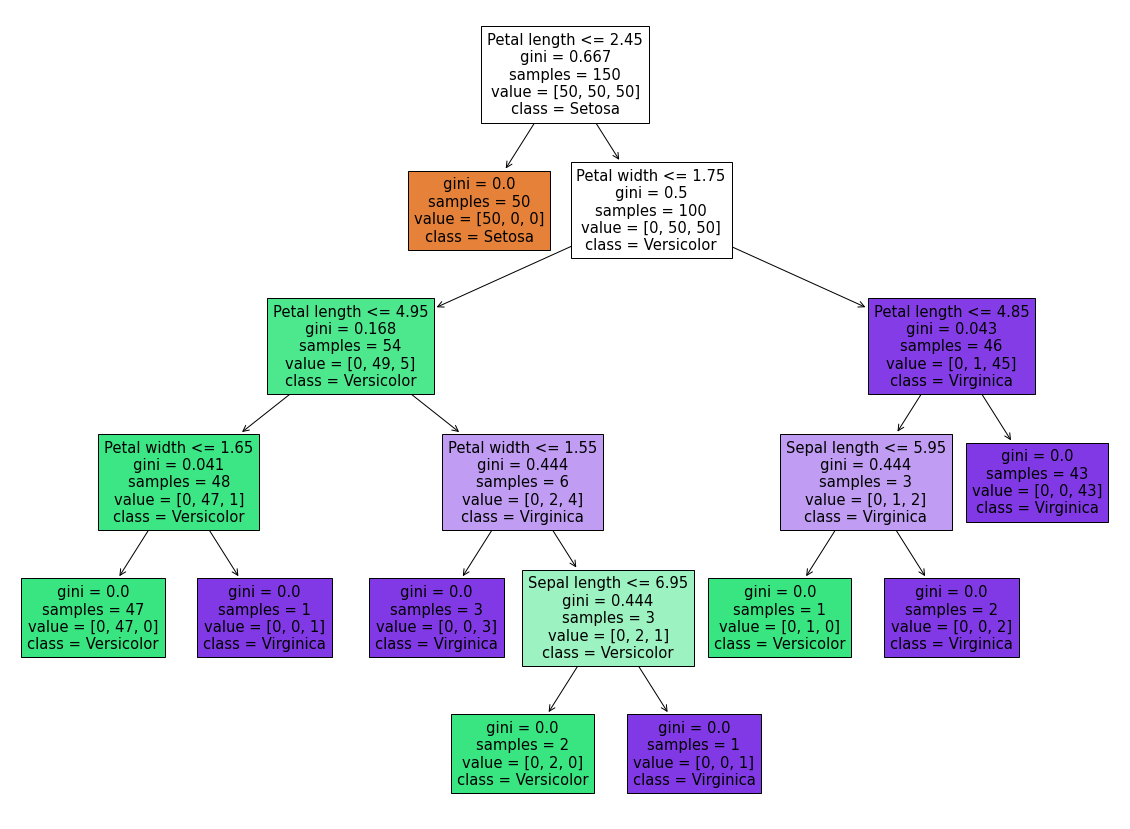

In [ ]:
plt.figure(figsize=(20,15))
tree=tree.plot_tree(model,feature_names=col_names,class_names=target_names,filled=True)